##### We need to predict the MPG of cars amogs their specs.
##### Task 1: Definining Exploratory Data Analysis with an overview of the whole project and also problem framing.
##### Task 2: Importing libraries and Exploring the Dataset.
##### Task 3: Creating visual methods to analyze the data.
##### Task 4: choose the impact features and target then split the data to train it.
##### Task 5: Check on the results of the linear model. 
##### Task 6: Check on the results of polynommial regression. 
##### Task 7: checking on the distribution of the residuals. 

# Task 2: Importing libraries and Exploring the Dataset

In [160]:
import pandas as pd
import  matplotlib.pyplot as plot
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
import math
import pylab
import scipy.stats as stats

In [30]:
carsData = pd.read_csv("auto_mpg_dataset.csv")
carsData.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


carsData.info()

There is no null values or missing data

# Task 3: Creating visual methods to analyze the data

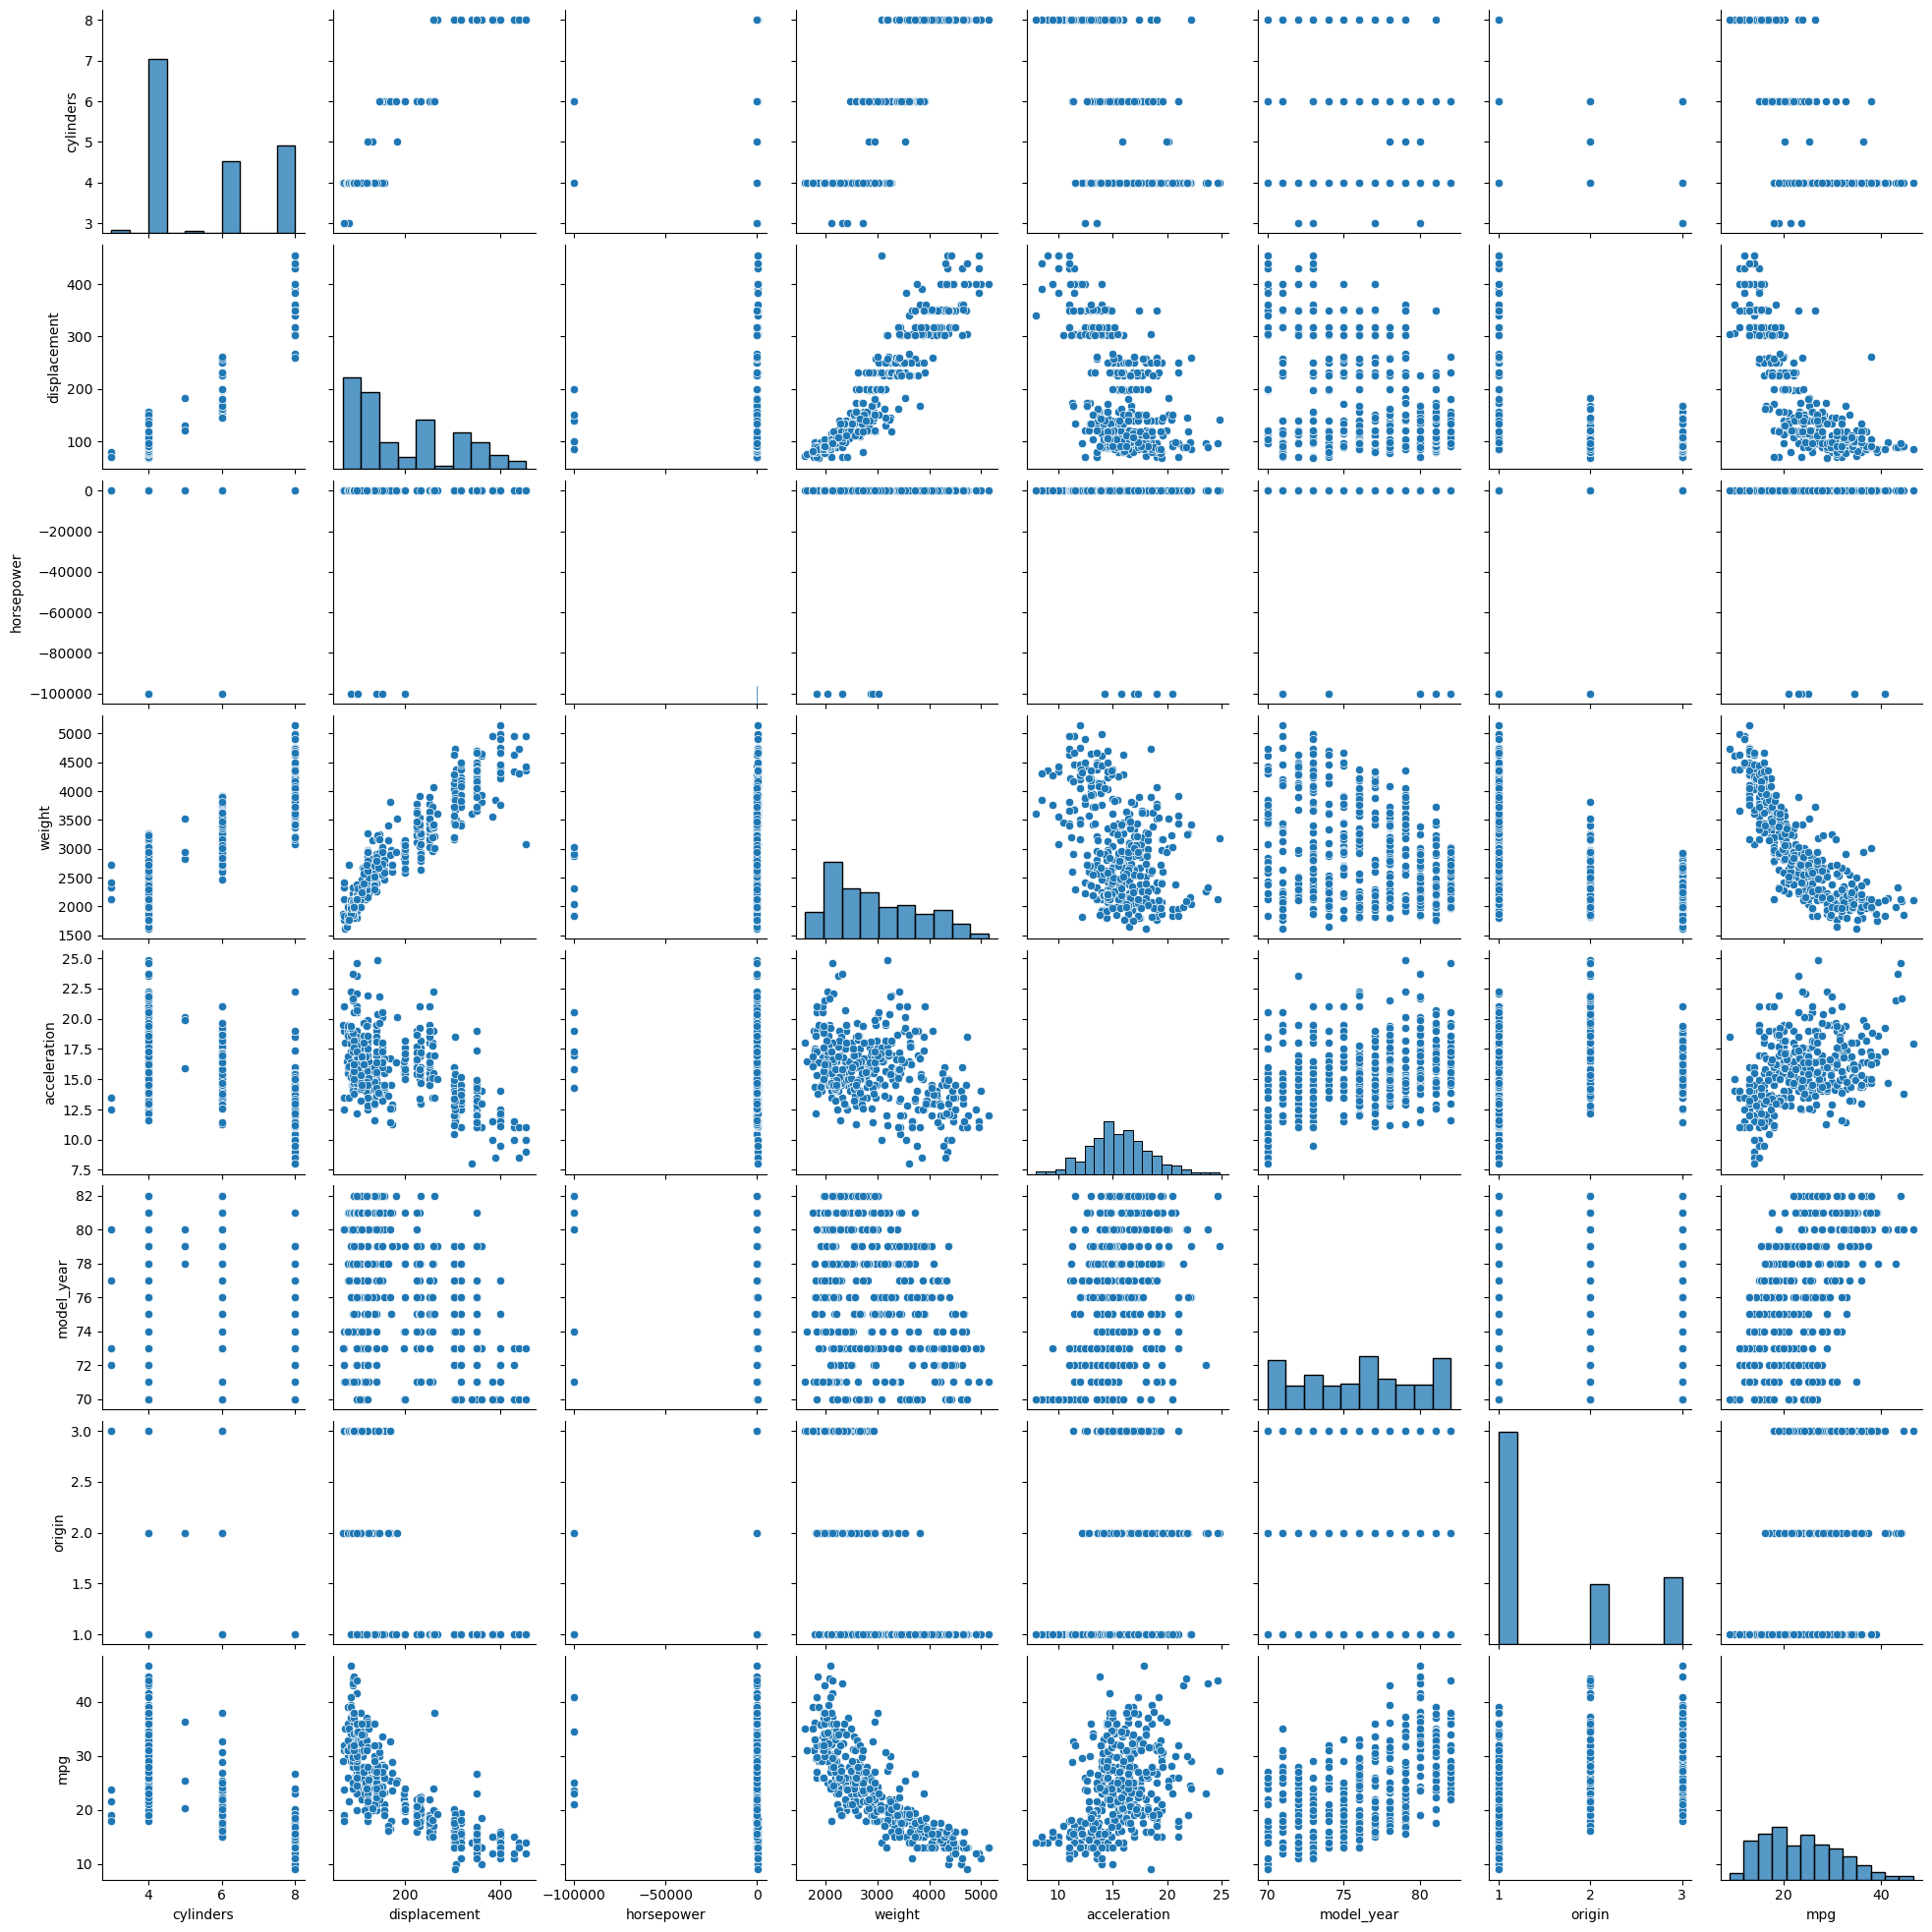

In [36]:
sns.pairplot(data = carsData)

Among the domain what specs that affect MPG is (cylinders,horsepower,weight) and from this plot i think there is outliers that should be removed in horsepower.

<Axes: xlabel='horsepower'>

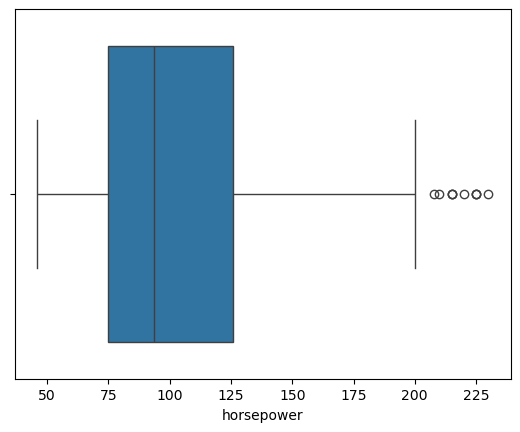

In [60]:
sns.boxplot(x=carsData['horsepower'])

There is an outliers in horsepower and will affect my model

In [63]:
#remove outliers from horsepower
carsData = carsData[carsData['horsepower'] != -100000]

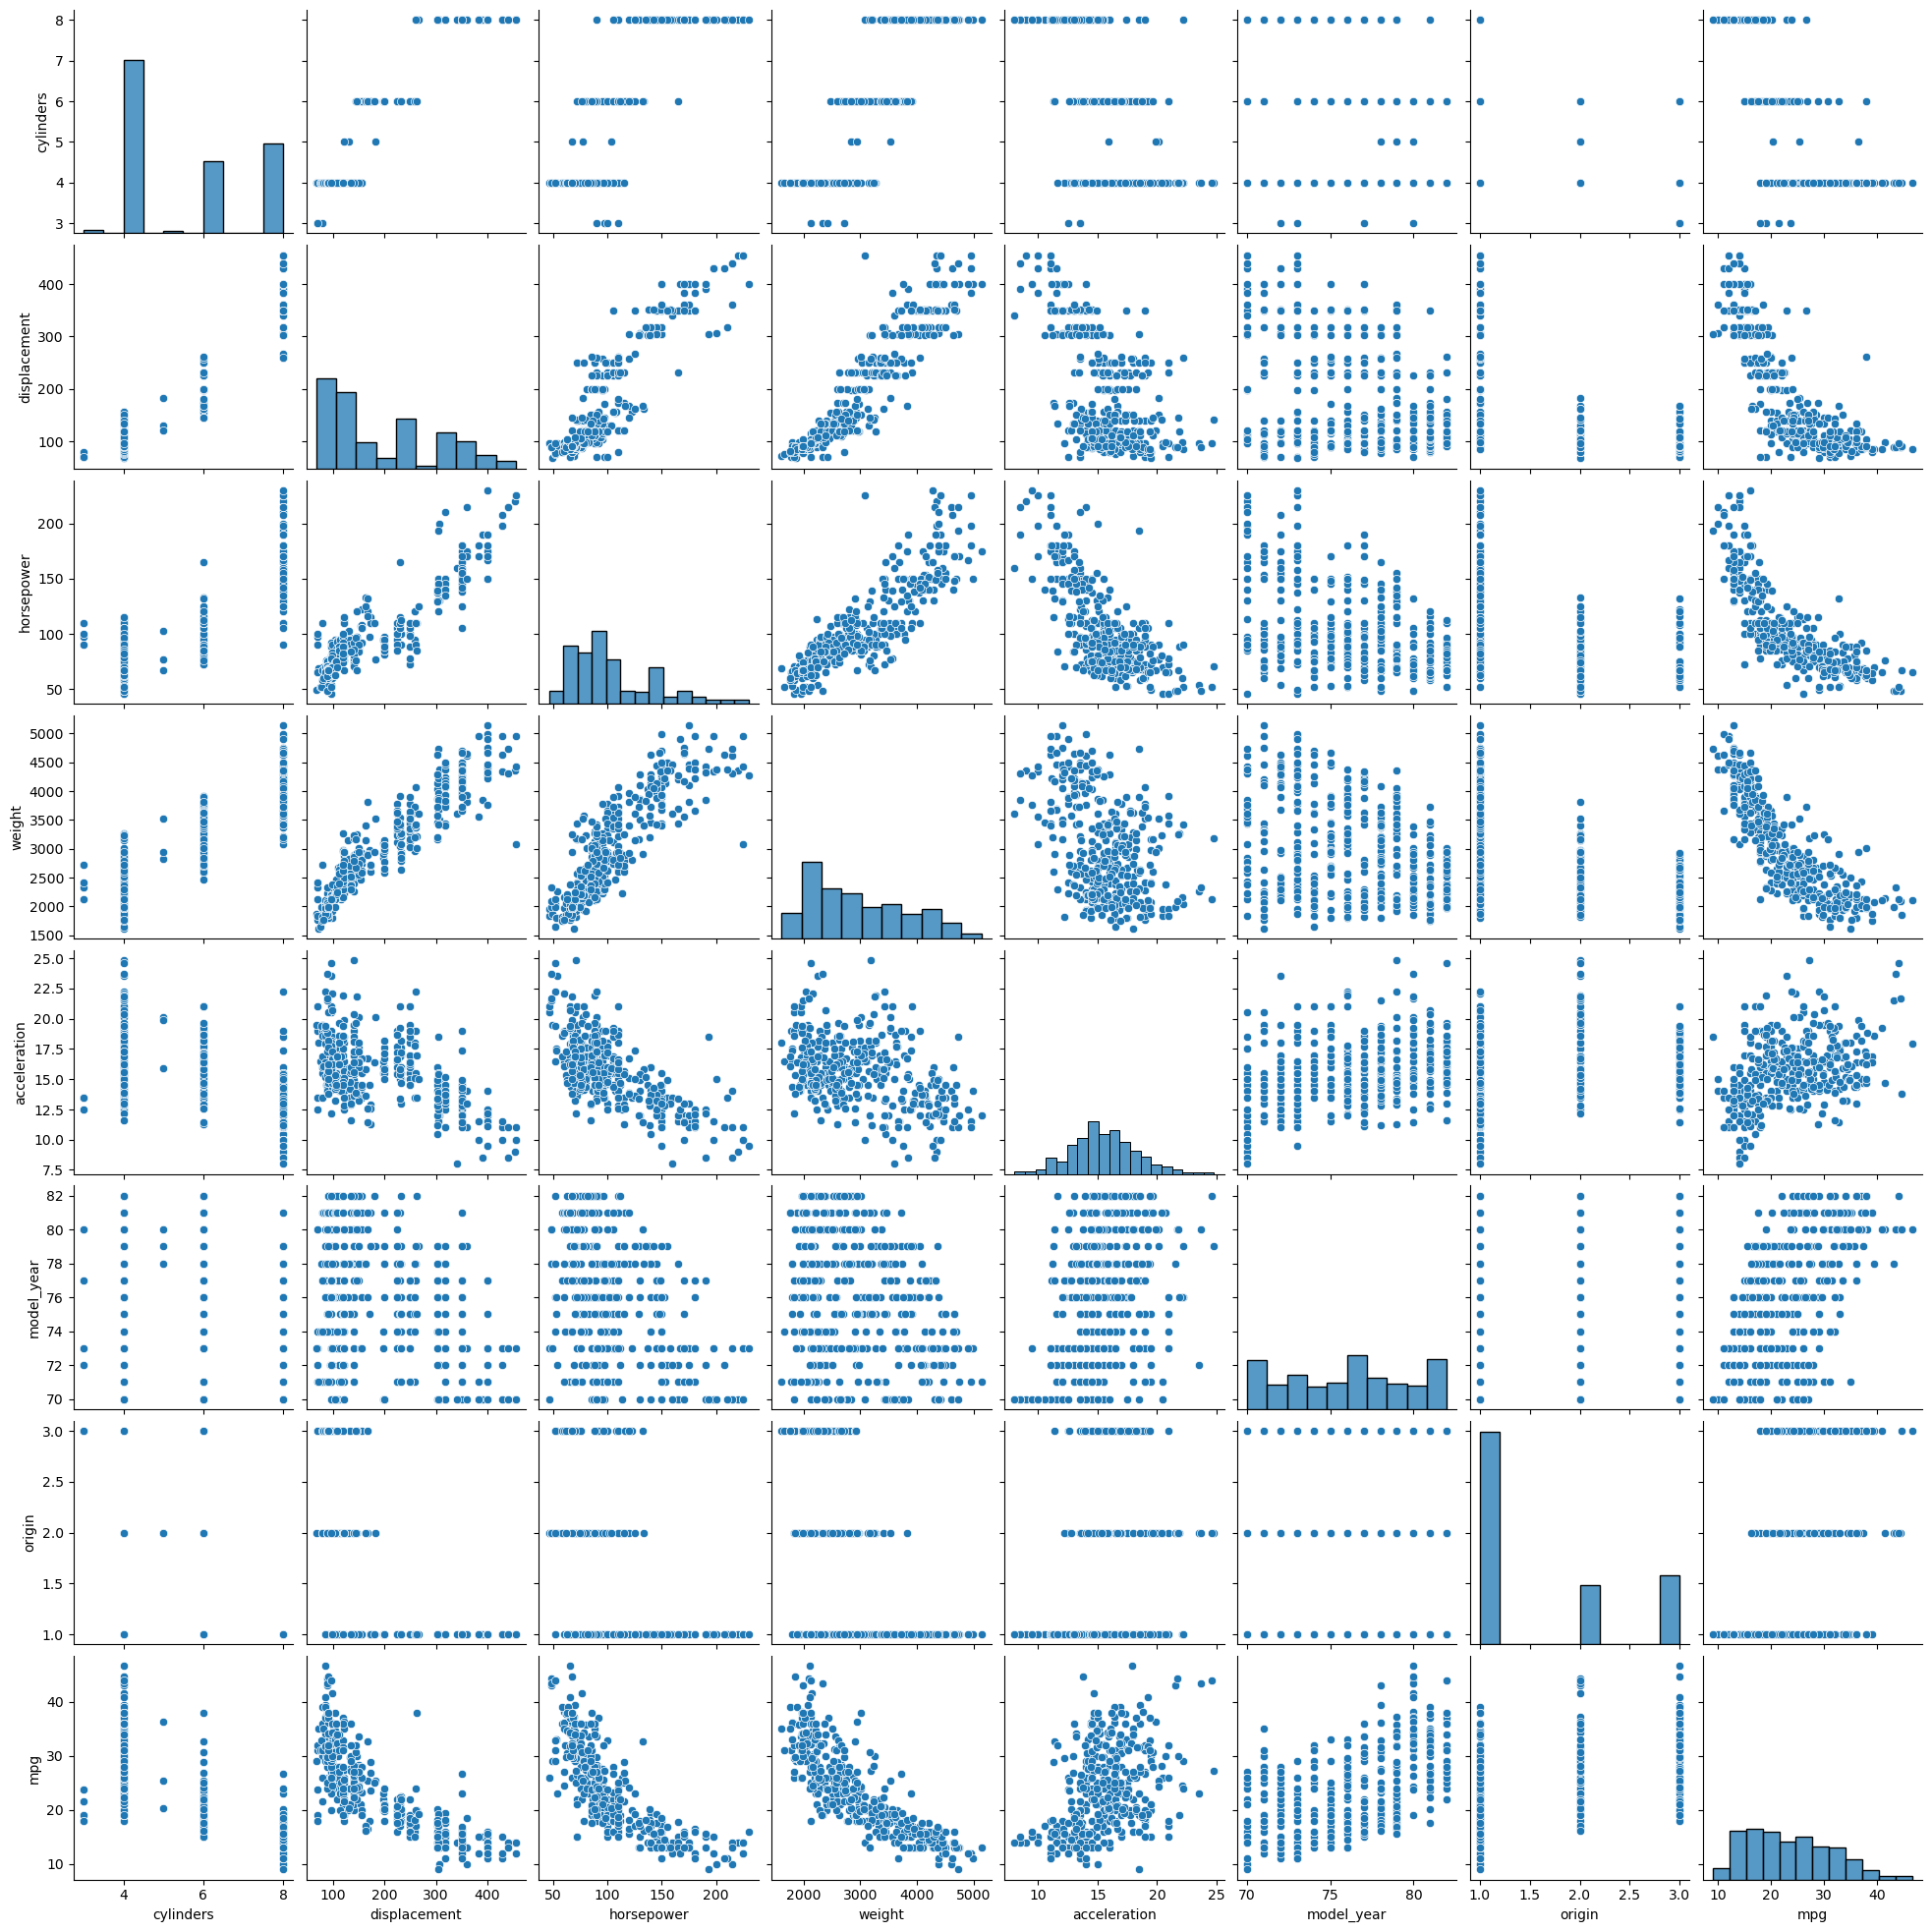

In [65]:
sns.pairplot(carsData)

So weight and horse power has correlation but cylinders not too much but the domain said it is important and also every year MPG increase due to development

# Task 4: choose the impact features and target then split the data to train it. 

In [259]:
#choosing impact features and target 
X = carsData[['cylinders','horsepower','weight','model_year','displacement']]
Y = carsData['mpg']

# Task 5: Check on the results of the Linear model. 

In [349]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# splitting the data to 30 percent test and 70 percent train
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
#train the linear model
regressor = LinearRegression()
regressor.fit(X_train,y_train)
#predict the yearly spendings
y_pred = regressor.predict(X_test)

Text(0.5, 0, 'Predictions')

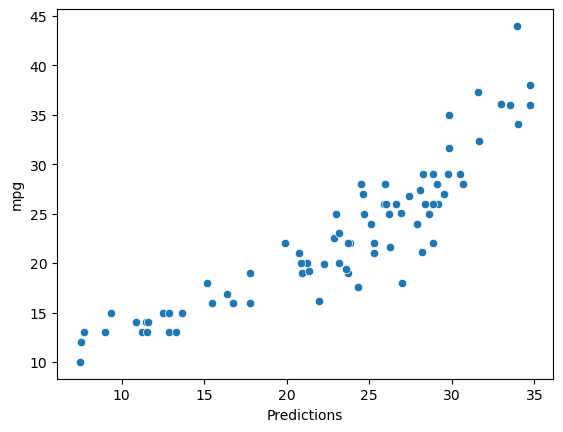

In [351]:
#compare the predicted values with real values 
sns.scatterplot(x=y_pred,y=y_test)
plot.xlabel("Predictions")

In [353]:
#checking on the errors
print("Mean Absolute Error: ",mean_absolute_error(y_pred,y_test))
print("Mean Squared Error: ",mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(y_pred,y_test)))

Mean Absolute Error:  2.502471318179214
Mean Squared Error:  10.557001079658187
Root Mean Squared Error:  3.2491539021194713


the plot and the error isn't too good because the linear regression is line and the data is curved so we will try polynomyal regress regression

# Task 6: Check on the results of polynommial regression

In [357]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

Text(0.5, 0, 'Predictions')

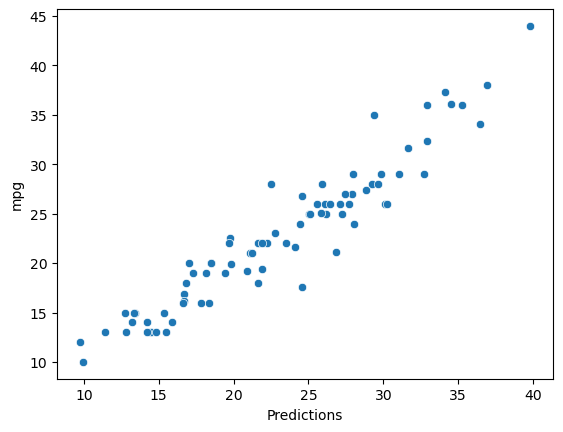

In [359]:
sns.scatterplot(x=y_pred_poly,y=y_test)
plot.xlabel("Predictions")

In [361]:
#checking on the errors
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_poly))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_poly))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(y_test, y_pred_poly)))

Mean Absolute Error:  1.680609362638449
Mean Squared Error:  5.028454078492484
Root Mean Squared Error:  2.2424214765499557


Error is lower than linear because the data is curved so polynomial will be better than linear

# Task 7: checking on the distribution of the residuals

<Axes: xlabel='mpg', ylabel='Count'>

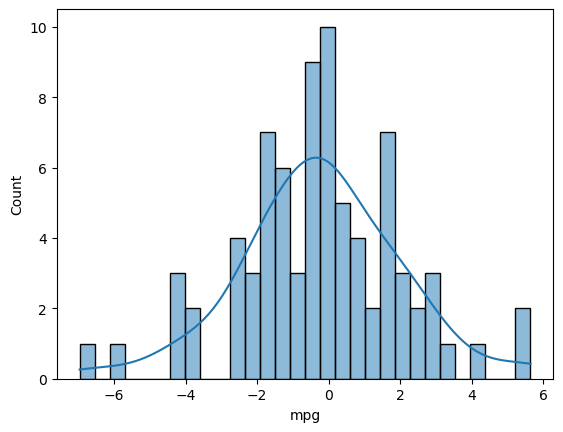

In [365]:
residuals = y_test-y_pred_poly
sns.histplot(residuals, bins=30,kde=True)

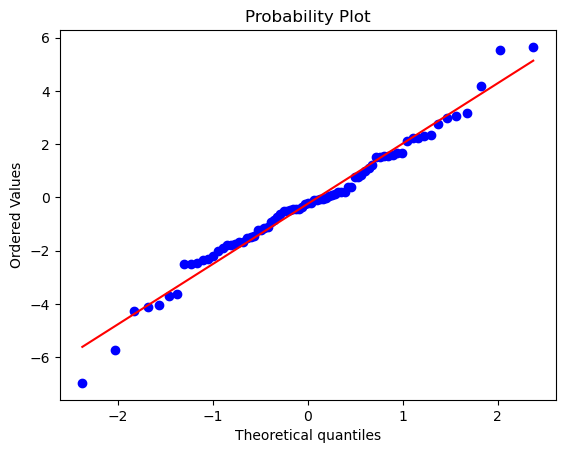

In [367]:
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

It is normally distributed